## Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize

data = pd.read_csv('data.csv') # Reading the data from local computer
X = data['x']
Y = data['y']
sigmaY = data['sigma_y']

In [2]:
def polynomial_fit(x, theta):
    return sum((x ** n)* t for (n, t) in enumerate(theta))

def logL(theta, model = polynomial_fit):
    y_fit = model(X, theta)
    return sum(stats.norm.logpdf(*args) for args in zip(Y, y_fit, sigmaY))

def best_theta(degree, model = polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp = False)

thetas = []
thetas.append(best_theta(1))
thetas.append(best_theta(2))
thetas.append(best_theta(3))

print('best-fit values :')
print("linear model:    theta = ", thetas[0])
print("quadratic model: theta = ", thetas[1])
print("cubic model:     theta = ", thetas[2])

best-fit values :
linear model:    theta =  [-1.11028083  2.79789862]
quadratic model: theta =  [-1.05578916  2.38475188  0.50261295]
cubic model:     theta =  [-1.02910476  1.97184133  1.74451272 -0.96725024]


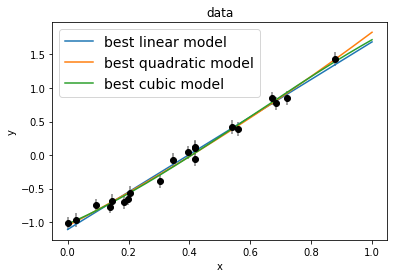

In [3]:
xfit = np.linspace(0, 1, 1000)
fig, ax = plt.subplots()
ax.errorbar(X, Y, sigmaY, fmt = 'ok', ecolor = 'gray')
ax.plot(xfit, polynomial_fit(xfit, thetas[0]), label = 'best linear model')
ax.plot(xfit, polynomial_fit(xfit, thetas[1]), label = 'best quadratic model')
ax.plot(xfit, polynomial_fit(xfit, thetas[2]), label = 'best cubic model')
ax.legend(loc = 'best', fontsize = 14)
ax.set(xlabel = 'x', ylabel = 'y', title = 'data');

In [4]:
print('logL Values :')
print("linear model:    logL = ", logL(thetas[0]))
print("quadratic model: logL = ", logL(thetas[1]))
print("cubic model: logL = ", logL(thetas[2]))

print('\nNaive approach (logL values): does not necessarily mean cubic is the best model.')

logL Values :
linear model:    logL =  22.01834340803627
quadratic model: logL =  22.92491031200275
cubic model: logL =  23.1304092587971

Naive approach (logL values): does not necessarily mean cubic is the best model.


In [5]:
def compute_chi2(degree):
    theta = best_theta(degree)
    resid = (Y - polynomial_fit(X, theta)) / sigmaY
    return np.sum(resid ** 2)

def compute_dof(degree):
    return data.shape[0] - (degree + 1)

def chi2_likelihood(degree):
    chi2 = compute_chi2(degree)
    dof = compute_dof(degree)
    return stats.chi2(dof).pdf(chi2)

In [6]:
print('chi2 likelihood :')
print("linear model:    chi2 = ", chi2_likelihood(1))
print("quadratic model: chi2 = ", chi2_likelihood(2))
print("cubic model:     chi2 = ", chi2_likelihood(3))

print('\nFrequentist Model : linear model is the best choice of all the models.')

chi2 likelihood :
linear model:    chi2 =  0.045383795585920046
quadratic model: chi2 =  0.0366084475501416
cubic model:     chi2 =  0.04215280601015518

Frequentist Model : linear model is the best choice of all the models.


In [7]:
# using the linear model as the null hypothesis
def p_value(degree):
    return 1-stats.chi2(degree-1).cdf(compute_chi2(1) - compute_chi2(degree))

print('p_values :')
print("quadratic model: chi2 = ", p_value(2))
print("cubic model:     chi2 = ", p_value(3))

print('\nBoth the p_values are greater than 0.05 so the null hypothesis is true\n')

p_values :
quadratic model: chi2 =  0.17813275695316477
cubic model:     chi2 =  0.328878844196578

Both the p_values are greater than 0.05 so the null hypothesis is true



In [8]:
print('Using the AICc as N/K is less than 40.\n')

def AICc(degree):
    return -2*logL(thetas[degree-1]) + (2*(degree+1)) + ((2*(degree+2)*(degree+1))/(20-degree-2))


# calculating AICc Values
AICc1 = AICc(1)
AICc2 = AICc(2)
AICc3 = AICc(3)

print('AICc values :')
print("linear model:    AICc1 = ", AICc(1))
print("quadratic model: AICc2 = ", AICc(2))
print("cubic model:     AICc3 = ", AICc(3))

print('\nAIC : Linear model is the best with the minimum AIC value.')

Using the AICc as N/K is less than 40.

AICc values :
linear model:    AICc1 =  -39.330804463131365
quadratic model: AICc2 =  -38.3498206240055
cubic model:     AICc3 =  -35.59415185092754

AIC : Linear model is the best with the minimum AIC value.


In [9]:
def BIC(degree):
    return -2*logL(thetas[degree-1]) + np.log(20)*(degree+1)

# calculating BIC Values
BIC1 = BIC(1)
BIC2 = BIC(2)
BIC3 = BIC(3)
print('BIC values :')
print("linear model:    BIC1 = ", BIC(1))
print("quadratic model: BIC2 = ", BIC(2))
print("cubic model:     BIC3 = ", BIC(3))

print('\nBIC : Linear model is the best with the minimum BIC value.')

BIC values :
linear model:    BIC1 =  -38.04522226896456
quadratic model: BIC2 =  -36.86262380334353
cubic model:     BIC3 =  -34.27788942337824

BIC : Linear model is the best with the minimum BIC value.


In [10]:
# calculating delta AIC values
AIC_min = min(AICc1, AICc2, AICc3)
print('Delta AIC values :')
print('linear model:    delta_AIC1 = ', AICc1-AIC_min)
print('quadratic model: delta_AIC2 = ', AICc2-AIC_min)
print('cubic model:     delta_AIC3 = ', AICc3-AIC_min)

print('\ndelta_AIC for quadratic model is in range 0 - 2 : Substantial Level of Empirical Support.')
print('delta_AIC for cubic model is in range close to 4     : Considerably Less.')
    

Delta AIC values :
linear model:    delta_AIC1 =  0.0
quadratic model: delta_AIC2 =  0.9809838391258623
cubic model:     delta_AIC3 =  3.7366526122038266

delta_AIC for quadratic model is in range 0 - 2 : Substantial Level of Empirical Support.
delta_AIC for cubic model is in range close to 4     : Considerably Less.


In [11]:
# calculating delta BIC values
BIC_min = min(BIC1, BIC2, BIC3)
print('Delta AIC values :')
print('linear model:    delta_BIC1 = ', BIC1-BIC_min)
print('quadratic model: delta_BIC2 = ', BIC2-BIC_min)
print('cubic model:     delta_BIC3 = ', BIC3-BIC_min)

print('\ndelta_BIC for quadratic model is in range 0 - 2 : Not worth evidence against the model.')
print('delta_BIC for cubic model is in range 2 - 6     : positive evidence against the model.')

Delta AIC values :
linear model:    delta_BIC1 =  0.0
quadratic model: delta_BIC2 =  1.1825984656210267
cubic model:     delta_BIC3 =  3.767332845586317

delta_BIC for quadratic model is in range 0 - 2 : Not worth evidence against the model.
delta_BIC for cubic model is in range 2 - 6     : positive evidence against the model.


## Problem 2

### Reference : https://bit.ly/2Sz2Ddz


### Abstract:
This paper analyzes the use of histograms of low-level image features ,such as color and luminance ,as descriptors for image-retrieval purposes. A novel definition of histogram capacity curve taking into account the density distribution of histograms in the corresponding spaces is proposed and used to quantify the effectiveness of  image descriptors and histogram dissimilarities in image retrieval applications. The results permit the design of scalable image-retrieval systems which make optimal use of computational and storage resources.

### Usage Of Kolmogorov-Smirnov test:
Binned densities(histograms) can be compared using statistical tests as well as using vector norms. Here the statiscal measure is used for the histograms.Here the Kolmogorov-Smirnov test is mis-used by making it work for high dimensional data (two or more than two dimensional data).

## Problem 3

In [12]:
import numpy as np
from scipy.stats import norm

# p value given in the abstract of the ATLAS discovery paper
p_value = 1.7 * pow(10,-9)
z = norm.isf(p_value)
print("Significance : ", z , "standard deviations")

# p value for the LIGO discovery
p_value = 2 * pow(10,-7)
z = norm.isf(p_value)
print("Significance : ", z)

'''
 -> Super-K discovery paper for neutrino oscillations
 -> dof and χ2 values from the paper
'''
dof = 67
chi2 = 65.2
print("Goodness of fit : ", 1-stats.chi2(dof).cdf(chi2) )


Significance :  5.911017938341624 standard deviations
Significance :  5.068957749717791
Goodness of fit :  0.5394901931099038
